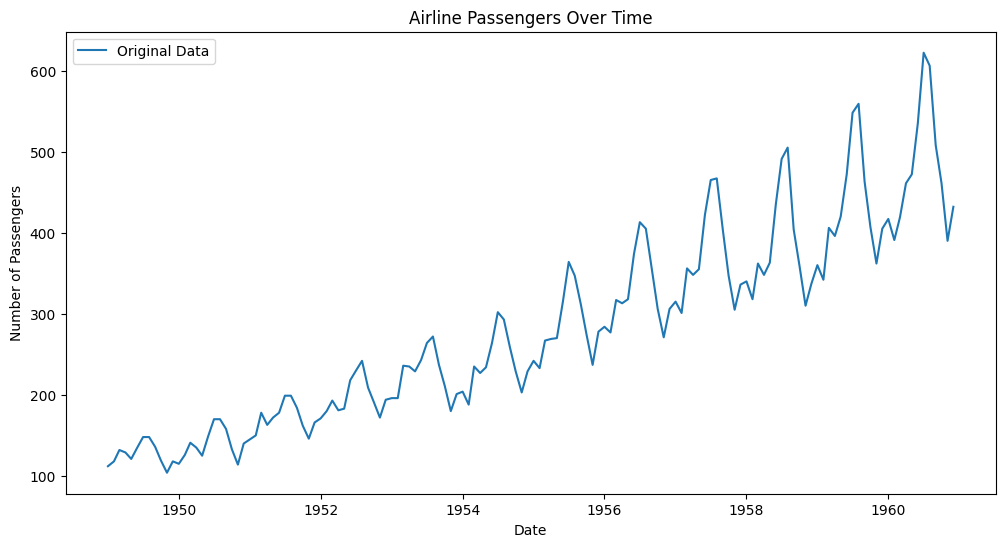

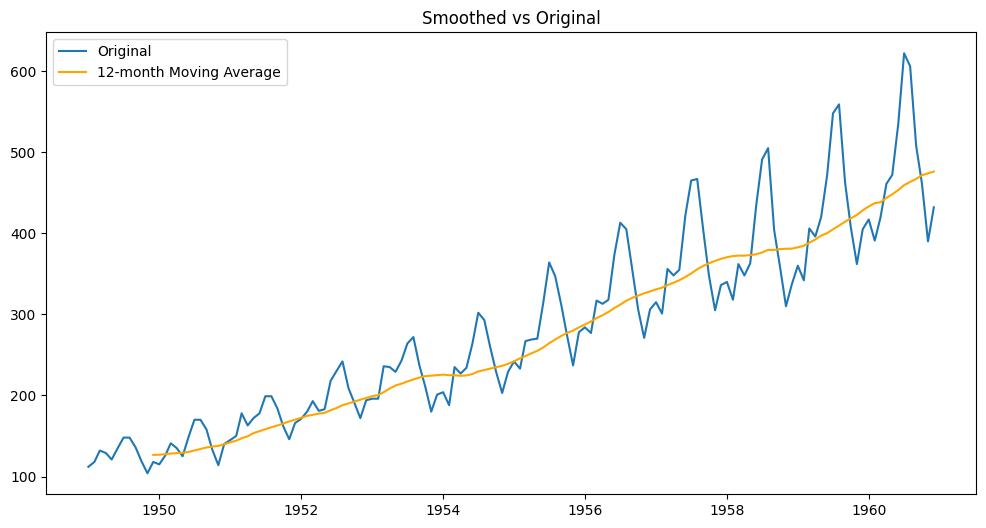

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


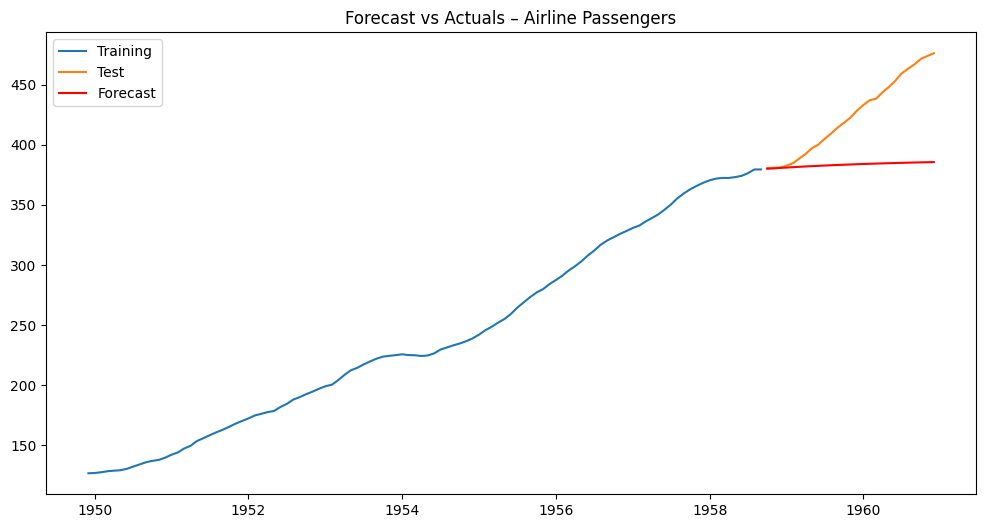

RMSE: 50.79


In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 2: Load the dataset
df = pd.read_csv('/content/ch3_airline_passengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Step 3: Visualize original data
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Data')
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Step 4: Apply Moving Average Smoothing
df['Smoothed'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['Smoothed'], label='12-month Moving Average', color='orange')
plt.title('Smoothed vs Original')
plt.legend()
plt.show()

# Step 5: Drop NaN values from smoothing
df_clean = df.dropna()

# Step 6: Split into training and test sets
train_size = int(len(df_clean) * 0.8)
train, test = df_clean['Smoothed'][:train_size], df_clean['Smoothed'][train_size:]

# Step 7: Fit an ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # You can tune this
model_fit = model.fit()

# Step 8: Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Step 9: Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Forecast vs Actuals – Airline Passengers')
plt.legend()
plt.show()

# Step 10: Evaluate forecast
rmse = sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.2f}")

